# Load Image

## skimage

In [ ]:
import numpy as np
import pandas as pd

In [ ]:
from skimage import io

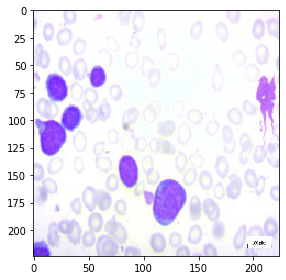

In [ ]:
img1 = io.imread('/content/WBC-Benign-001.jpg')
io.imshow(img1)

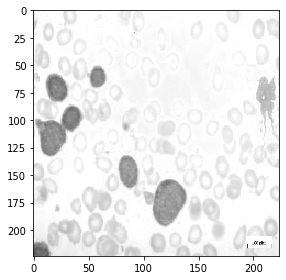

In [ ]:
citraR = img1[:,:,0]
io.imsave('CitraRed.jpg', citraR)
io.imshow(citraR)

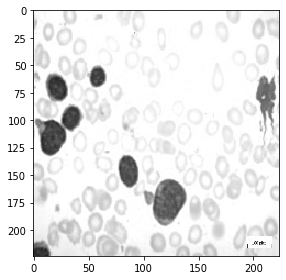

In [ ]:
citraG = img1[:,:,1]
io.imsave('CitraGreen.jpg', citraG)
io.imshow(citraG)

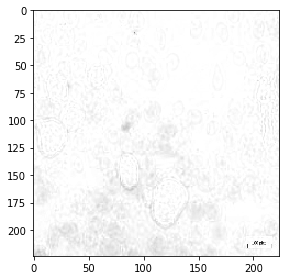

In [ ]:
citraB = img1[:,:,2]
io.imsave('CitraBlue.jpg', citraB)
io.imshow(citraB)

## cv2

In [ ]:
import cv2
import matplotlib.pyplot as plt

In [ ]:
img = cv2.imread('/content/WBC-Benign-001.jpg')

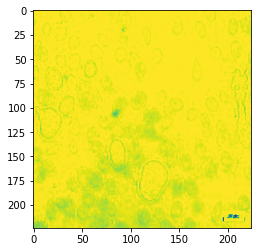

In [ ]:
cv2.imwrite('red.jpg', img[:,:,0])
plt.imshow(img[:,:,0])

array([[242, 242, 242, ..., 245, 238, 241],
       [239, 243, 242, ..., 245, 240, 240],
       [236, 244, 244, ..., 247, 242, 237],
       ...,
       [ 57,  43,  40, ..., 235, 234, 235],
       [ 64,  47,  42, ..., 233, 236, 234],
       [ 72,  55,  50, ..., 233, 235, 235]], dtype=uint8)

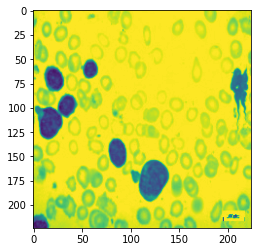

In [ ]:
cv2.imwrite('green.jpg', img[:,:,1])
plt.imshow(img[:,:,1])

array([[245, 245, 248, ..., 255, 246, 249],
       [243, 246, 245, ..., 255, 248, 248],
       [243, 248, 247, ..., 254, 250, 245],
       ...,
       [105,  90,  92, ..., 240, 238, 239],
       [111,  94,  95, ..., 237, 240, 237],
       [117, 102, 103, ..., 237, 239, 238]], dtype=uint8)

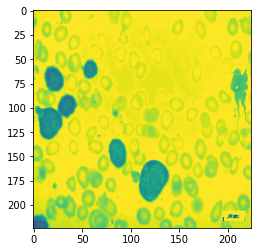

In [ ]:
cv2.imwrite('blue.jpg', img[:,:,2])
plt.imshow(img[:,:,2])

In [ ]:
img.shape

(224, 224, 3)

In [ ]:
r = img[:,:,0]
r

array([[253, 253, 255, ..., 254, 249, 252],
       [253, 254, 253, ..., 254, 251, 251],
       [252, 255, 253, ..., 255, 253, 248],
       ...,
       [237, 219, 211, ..., 255, 249, 249],
       [228, 211, 210, ..., 250, 250, 245],
       [227, 213, 216, ..., 250, 249, 246]], dtype=uint8)

In [ ]:
r[0:4,0:3]

array([[253, 253, 255],
       [253, 254, 253],
       [252, 255, 253],
       [248, 255, 252]], dtype=uint8)

# Convolution

In [ ]:
%matplotlib inline
# Read image
image = cv2.imread('/content/WBC-Benign-001.jpg')

In [ ]:
def kernel2D(img, ukuran, pembagi):
  # create kernel
  kernel = np.ones((ukuran,ukuran))/pembagi
  print(kernel)
  # Applying the filter2D() function
  img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  return img

[[0.04 0.04 0.04]
 [0.04 0.04 0.04]
 [0.04 0.04 0.04]]


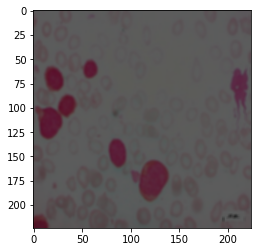

In [ ]:
uk3p25 = kernel2D(image, 3, 25)
plt.imshow(uk3p25)

[[0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]
 [0.04 0.04 0.04 0.04 0.04]]


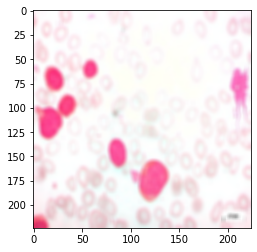

In [ ]:
uk5p25 = kernel2D(image, 5, 25)
plt.imshow(uk5p25)

[[0.03333333 0.03333333 0.03333333]
 [0.03333333 0.03333333 0.03333333]
 [0.03333333 0.03333333 0.03333333]]


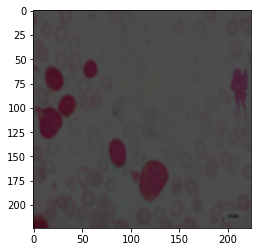

In [ ]:
uk3p30 = kernel2D(image, 3, 30)
plt.imshow(uk3p30)

In [ ]:
uk5p30 = kernel2D(image, 5, 30)
plt.imshow(uk5p30)

In [ ]:
x = np.random.randint(size=(10,10), low=0, high=10)
kernel = np.ones((5,5))/25
x , kernel

(array([[4, 1, 9, 4, 8, 5, 1, 6, 5, 5],
        [8, 7, 7, 6, 5, 0, 5, 0, 8, 4],
        [6, 3, 2, 4, 9, 8, 1, 8, 7, 7],
        [8, 0, 1, 9, 0, 8, 2, 3, 8, 4],
        [0, 0, 0, 9, 3, 2, 9, 8, 9, 9],
        [6, 2, 8, 8, 7, 7, 2, 9, 3, 3],
        [7, 4, 5, 6, 5, 9, 1, 1, 5, 1],
        [1, 5, 5, 0, 2, 7, 0, 6, 3, 3],
        [5, 6, 3, 6, 4, 6, 0, 2, 7, 4],
        [2, 8, 9, 8, 1, 0, 0, 0, 7, 1]]),
 array([[0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04, 0.04, 0.04]]))

In [ ]:
x[:3, :3]
np.sum(np.multiply(x[:3, :3],kernel))

-5

In [ ]:
def calculate_target_size(img_size: int, kernel_size: int) -> int:
    num_pixels = 0
    
    # From 0 up to img size (if img size = 224, then up to 223)
    for i in range(img_size):
        # Add the kernel size (let's say 3) to the current i
        added = i + kernel_size
        # It must be lower than the image size
        if added <= img_size:
            # Increment if so
            num_pixels += 1
            
    return num_pixels

In [ ]:
def convolve(img: np.array, kernel: np.array) -> np.array:
    # Assuming a rectangular image
    tgt_size = calculate_target_size(
        img_size=img.shape[0],
        kernel_size=kernel.shape[0]
    )
    print(tgt_size)
    # To simplify things
    k = kernel.shape[0]
    
    # 2D array of zeros
    convolved_img = np.zeros(shape=(tgt_size, tgt_size))
    
    # Iterate over the rows
    for i in range(tgt_size):
        # Iterate over the columns
        for j in range(tgt_size):
            # img[i, j] = individual pixel value
            # Get the current matrix
            mat = img[i:i+k, j:j+k]
            
            # Apply the convolution - element-wise multiplication and summation of the result
            # Store the result to i-th row and j-th column of our convolved_img array
            convolved_img[i, j] = np.sum(np.multiply(mat, kernel))
            
    return convolved_img

In [ ]:
y1 = convolve(x, kernel)

8


In [ ]:
x

array([[8, 4, 9, 3, 1, 5, 2, 5, 7, 3],
       [5, 2, 4, 3, 6, 7, 7, 6, 3, 7],
       [9, 2, 8, 0, 4, 3, 1, 6, 3, 1],
       [2, 1, 2, 9, 2, 9, 1, 8, 3, 7],
       [9, 0, 8, 1, 5, 9, 4, 9, 1, 2],
       [4, 6, 9, 7, 9, 6, 3, 5, 0, 1],
       [2, 0, 9, 9, 9, 3, 5, 5, 1, 0],
       [5, 3, 0, 3, 1, 0, 6, 2, 1, 4],
       [5, 6, 6, 9, 2, 9, 5, 4, 5, 6],
       [8, 0, 4, 2, 7, 1, 5, 3, 7, 8]])

In [ ]:
y1

array([[ -5.,  -2.,   2.,  15.,  14.,  19.,   9.,  -8.],
       [-10.,  32., -24.,   9.,  -6., -12.,  12.,   2.],
       [ -1., -16.,  40., -17.,  30., -17.,  21.,  -4.],
       [-24.,  28., -24.,   4.,  21.,  -2.,  27.,  -9.],
       [ 17.,  15.,   7.,  18.,   6.,  -5.,   8.,  -8.],
       [-20.,  27.,  17.,  23.,  -5.,   8.,  12.,  -1.],
       [  4., -21.,  -4.,  -9., -19.,  18.,  -6.,  -7.],
       [ 16.,  11.,  32., -16.,  37.,   1.,   5.,   7.]])

In [ ]:
y2

array([[3., 0., 3., 3., 4., 4., 2., 1., 2., 0.],
       [3., 5., 5., 3., 4., 7., 5., 5., 3., 0.],
       [3., 5., 5., 2., 3., 2., 3., 3., 3., 0.],
       [3., 3., 3., 2., 2., 2., 3., 5., 5., 0.],
       [3., 3., 3., 4., 5., 4., 5., 5., 5., 0.],
       [1., 6., 3., 7., 4., 4., 3., 3., 5., 0.],
       [2., 7., 7., 7., 4., 4., 3., 2., 1., 0.],
       [2., 8., 8., 7., 4., 4., 2., 2., 2., 0.],
       [3., 3., 7., 4., 3., 2., 2., 2., 5., 0.],
       [0., 3., 3., 3., 2., 1., 1., 1., 3., 0.]])

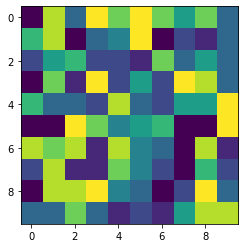

In [ ]:
plt.imshow(x)

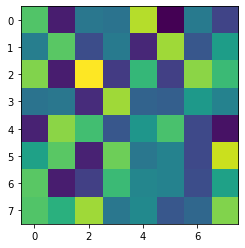

In [ ]:
plt.imshow(y)

In [ ]:
x = np.random.randint(size=(255,255), low=0, high=10)
kernel = np.ones((3,3))/25
x, kernel

(array([[9, 2, 1, ..., 3, 2, 7],
        [4, 9, 6, ..., 1, 8, 6],
        [0, 0, 6, ..., 0, 4, 2],
        ...,
        [3, 3, 1, ..., 3, 1, 4],
        [7, 2, 6, ..., 2, 0, 2],
        [3, 4, 9, ..., 6, 2, 3]]), array([[0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04]]))

In [ ]:
k = 3
u = np.zeros((len(x)+2, len(x)+2), dtype=int) 

In [ ]:
u[1:-1,1:-1] = x
print(u)
(u[0:3,0:3] * kernel).sum()
np.sum(np.multiply(u[0:3,0:3], kernel))

[[0 0 0 0 0 0 0 0]
 [0 6 2 9 1 8 0 0]
 [0 7 5 4 0 1 0 0]
 [0 7 4 5 6 3 8 0]
 [0 4 4 9 5 2 6 0]
 [0 0 2 2 2 1 7 0]
 [0 1 4 0 1 4 5 0]
 [0 0 0 0 0 0 0 0]]


21

In [ ]:
def meanFilter2D(data: np.array, ukuran_kernel: int) -> np.array:
  # ukuran padding
  kw = ukuran_kernel // 2
  # untuk data output
  dataOut = np.zeros_like(data, dtype=np.float32)
  # generate karnel
  # kernel = np.random.randint(size=(ukuran_kernel, ukuran_kernel), low=-1, high=5)
  kernel = np.ones((ukuran_kernel,ukuran_kernel))/25
  dataPd = np.zeros((len(data)+kw*2, len(data)+kw*2)) 
  dataPd[kw:-kw, kw:-kw] = data
  print(dataPd)
  # melakukan perkalian dan penjumlahan
  for i in range(len(data)):
    for j in range(len(data)):
      dataXkernel = dataPd[i:ukuran_kernel+i, j:ukuran_kernel+j]
      dataOut[i,j] = np.sum((dataXkernel * kernel))
  # mengganti nilai < 0 = 0
  dataOut[dataOut < 0] = 0
  # mengganti nilai > 255 = 255
  dataOut[dataOut > 255] = 255

  return dataOut

In [ ]:
x.shape

(6, 6)

In [ ]:
b , a = meanFilter(x, 3)

kernel [[0.04 0.04 0.04]
 [0.04 0.04 0.04]
 [0.04 0.04 0.04]]
datapd [[0. 0. 0. ... 0. 0. 0.]
 [0. 9. 2. ... 2. 7. 0.]
 [0. 4. 9. ... 8. 6. 0.]
 ...
 [0. 7. 2. ... 0. 2. 0.]
 [0. 3. 4. ... 2. 3. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


In [ ]:
b

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 9., 2., ..., 2., 7., 0.],
       [0., 4., 9., ..., 8., 6., 0.],
       ...,
       [0., 7., 2., ..., 0., 2., 0.],
       [0., 3., 4., ..., 2., 3., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [ ]:
a

array([[0, 1, 0, ..., 1, 1, 0],
       [0, 1, 1, ..., 1, 1, 1],
       [0, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 0, 0, 0],
       [0, 1, 1, ..., 0, 0, 0],
       [0, 1, 0, ..., 0, 0, 0]])

In [ ]:
convolve(b,kernel)

255


array([[0.96, 1.24, 1.  , ..., 1.  , 1.08, 0.92],
       [0.96, 1.48, 1.6 , ..., 1.48, 1.32, 1.16],
       [0.88, 1.36, 1.84, ..., 1.76, 1.64, 1.28],
       ...,
       [1.24, 1.84, 1.28, ..., 0.84, 0.72, 0.52],
       [0.88, 1.52, 1.16, ..., 0.92, 0.92, 0.48],
       [0.64, 1.24, 0.96, ..., 0.52, 0.6 , 0.28]])

In [ ]:
image = cv2.imread("BloodImage_00023.jpg", cv2.IMREAD_GRAYSCALE)

In [ ]:
image.shape

(480, 640)

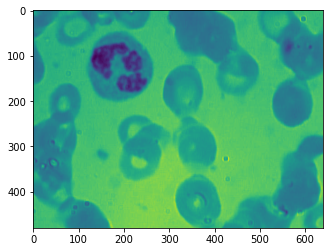

In [ ]:
plt.imshow(image)

In [ ]:
temp = cv2.resize(image, (255, 255))

In [ ]:
temp.shape

(255, 255)

In [ ]:
len(image)

480

In [ ]:
a, b, c = meanFilter(temp, 3)

kernel [[0.04 0.04 0.04]
 [0.04 0.04 0.04]
 [0.04 0.04 0.04]]
datapd [[  0   0   0 ...   0   0   0]
 [  0 176 172 ... 197 194   0]
 [  0 180 177 ... 200 198   0]
 ...
 [  0 197 199 ... 204 206   0]
 [  0 197 198 ... 205 207   0]
 [  0   0   0 ...   0   0   0]]


In [ ]:
c

array([[28, 41, 40, ..., 47, 47, 31],
       [42, 63, 61, ..., 71, 70, 47],
       [43, 64, 62, ..., 70, 71, 47],
       ...,
       [47, 71, 71, ..., 73, 73, 48],
       [47, 71, 71, ..., 73, 73, 49],
       [31, 47, 47, ..., 49, 49, 32]], dtype=uint8)

In [ ]:
b

array([[  0,   0,   0, ...,   0,   0,   0],
       [  0, 176, 172, ..., 197, 194,   0],
       [  0, 180, 177, ..., 200, 198,   0],
       ...,
       [  0, 197, 199, ..., 204, 206,   0],
       [  0, 197, 198, ..., 205, 207,   0],
       [  0,   0,   0, ...,   0,   0,   0]])

In [ ]:
convolve(b, a)

255


array([[28.2 , 41.76, 40.84, ..., 47.4 , 47.32, 31.56],
       [42.76, 63.28, 61.88, ..., 71.  , 70.96, 47.36],
       [43.32, 64.2 , 62.96, ..., 70.92, 71.08, 47.52],
       ...,
       [47.44, 71.2 , 71.44, ..., 73.48, 73.28, 48.92],
       [47.44, 71.2 , 71.44, ..., 73.64, 73.68, 49.2 ],
       [31.64, 47.48, 47.64, ..., 49.12, 49.24, 32.88]])

In [ ]:
test

(array([[0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04],
        [0.04, 0.04, 0.04]]), array([[  0,   0,   0, ...,   0,   0,   0],
        [  0, 176, 172, ..., 197, 194,   0],
        [  0, 180, 177, ..., 200, 198,   0],
        ...,
        [  0, 197, 199, ..., 204, 206,   0],
        [  0, 197, 198, ..., 205, 207,   0],
        [  0,   0,   0, ...,   0,   0,   0]]), array([[28, 41, 40, ..., 47, 47, 31],
        [42, 63, 61, ..., 71, 70, 47],
        [43, 64, 62, ..., 70, 71, 47],
        ...,
        [47, 71, 71, ..., 73, 73, 48],
        [47, 71, 71, ..., 73, 73, 49],
        [31, 47, 47, ..., 49, 49, 32]], dtype=uint8))

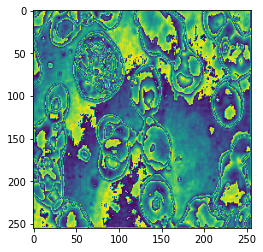

In [ ]:
plt.imshow(test)

In [ ]:
pd.DataFrame(test)

,0,1,2,3,4,5,6,7,8,9,...,245,246,247,248,249,250,251,252,253,254
0,20,204,171,129,105,70,58,38,37,43,...,165,164,165,171,179,184,179,175,173,102
1,227,84,20,196,151,91,53,22,14,10,...,196,192,194,205,212,227,230,225,213,64
2,11,123,74,244,187,114,79,34,3,238,...,196,192,194,202,208,215,219,220,223,77
3,20,140,109,24,218,136,97,25,243,226,...,196,188,182,207,194,218,194,197,202,60
4,255,108,105,33,219,138,86,21,238,217,...,184,189,182,203,190,187,170,176,184,48
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
250,185,222,234,238,236,224,216,232,230,250,...,130,188,33,191,53,127,100,44,33,111
251,183,232,240,240,243,231,227,232,236,247,...,127,179,26,169,42,145,113,76,49,119
252,184,228,246,240,232,228,220,236,242,243,...,107,165,254,130,5,94,110,90,75,138
253,187,231,242,240,232,228,220,236,242,249,...,90,152,230,79,204,51,82,96,96,151


In [ ]:
kernel[kernel > 255] = 255

In [ ]:
kernel

array([[  0,   0,   0],
       [  0, 255,   0],
       [  0,   0,   0]])

In [ ]:
def kernel2D(img, ukuran, pembagi):
  # create kernel
  kernel = np.ones((ukuran,ukuran))/pembagi
  print(kernel)
  # Applying the filter2D() function
  img = cv2.filter2D(src=img, ddepth=-1, kernel=kernel)
  return img

In [ ]:
b

array([[0, 0, 0, 0, 0, 0, 0, 0],
       [0, 3, 7, 2, 4, 7, 8, 0],
       [0, 9, 2, 8, 8, 4, 1, 0],
       [0, 4, 3, 5, 1, 6, 6, 0],
       [0, 6, 2, 4, 0, 7, 3, 0],
       [0, 1, 5, 9, 6, 6, 2, 0],
       [0, 3, 6, 0, 8, 9, 8, 0],
       [0, 0, 0, 0, 0, 0, 0, 0]])

In [ ]:
zz = kernel2D(b, 3, 25)

[[0.04 0.04 0.04]
 [0.04 0.04 0.04]
 [0.04 0.04 0.04]]


error: ignored

In [ ]:
zz

array([[64, 63, 61, ..., 71, 71, 71],
       [64, 63, 62, ..., 71, 71, 71],
       [65, 64, 63, ..., 71, 71, 71],
       ...,
       [71, 71, 71, ..., 73, 73, 73],
       [71, 71, 71, ..., 74, 74, 74],
       [71, 71, 71, ..., 74, 74, 74]], dtype=uint8)

In [ ]:
zu = meanFilter(temp, 3)

kernel [[0.04 0.04 0.04]
 [0.04 0.04 0.04]
 [0.04 0.04 0.04]]
datapd [[  0   0   0 ...   0   0   0]
 [  0 176 172 ... 197 194   0]
 [  0 180 177 ... 200 198   0]
 ...
 [  0 197 199 ... 204 206   0]
 [  0 197 198 ... 205 207   0]
 [  0   0   0 ...   0   0   0]]


(255, 255)

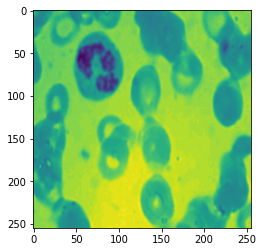

In [ ]:
plt.imshow(zz)
zz.shape

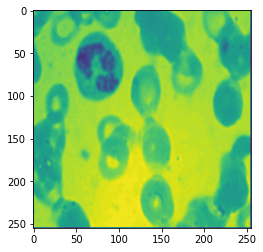

In [ ]:
plt.imshow(zu)

In [ ]:
import numpy as np

def filter2d(image, kernel):
    # Get the dimensions of the image and kernel
    rows, cols = image.shape
    k_rows, k_cols = kernel.shape

    # Calculate the padding required to maintain the image size after convolution
    pad_rows = (k_rows - 1) // 2
    pad_cols = (k_cols - 1) // 2

    # Create a padded image
    padded_image = np.zeros((rows + 2 * pad_rows, cols + 2 * pad_cols))
    padded_image[pad_rows:pad_rows + rows, pad_cols:pad_cols + cols] = image

    print(padded_image)
    # Create an output image
    output = np.zeros((rows, cols), dtype=np.float32)

    # Convolve the image with the kernel
    for i in range(pad_rows, pad_rows + rows):
        for j in range(pad_cols, pad_cols + cols):
            output[i - pad_rows, j - pad_cols] = np.sum(padded_image[i - pad_rows:i + pad_rows + 1, j - pad_cols:j + pad_cols + 1] * kernel)

    return output


In [ ]:
meanFilter(x, 5)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 1. 9. 4. 8. 5. 1. 6. 5. 5. 0. 0.]
 [0. 0. 8. 7. 7. 6. 5. 0. 5. 0. 8. 4. 0. 0.]
 [0. 0. 6. 3. 2. 4. 9. 8. 1. 8. 7. 7. 0. 0.]
 [0. 0. 8. 0. 1. 9. 0. 8. 2. 3. 8. 4. 0. 0.]
 [0. 0. 0. 0. 0. 9. 3. 2. 9. 8. 9. 9. 0. 0.]
 [0. 0. 6. 2. 8. 8. 7. 7. 2. 9. 3. 3. 0. 0.]
 [0. 0. 7. 4. 5. 6. 5. 9. 1. 1. 5. 1. 0. 0.]
 [0. 0. 1. 5. 5. 0. 2. 7. 0. 6. 3. 3. 0. 0.]
 [0. 0. 5. 6. 3. 6. 4. 6. 0. 2. 7. 4. 0. 0.]
 [0. 0. 2. 8. 9. 8. 1. 0. 0. 0. 7. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[1.88, 2.44, 3.32, 3.12, 2.96, 2.8 , 3.04, 2.8 , 2.28, 2.  ],
       [2.24, 3.16, 4.04, 3.84, 3.76, 3.68, 3.88, 3.8 , 2.96, 2.6 ],
       [2.24, 3.52, 4.52, 4.4 , 4.68, 4.92, 5.12, 5.28, 4.36, 3.64],
       [2.32, 3.76, 4.72, 4.6 , 4.88, 5.28, 5.24, 5.36, 4.36, 3.6 ],
       [2.08, 3.52, 4.48, 4.76, 5.  , 5.52, 5.36, 5.36, 4.  , 3.4 ],
       [2.08, 3.36, 4.04, 4.48, 4.6 , 4.92, 4.76, 4.88, 3.56, 3.  ],
       [2.28, 3.44, 4.28, 4.76, 4.56, 4.76, 4.68, 4.64, 3.4 , 2.92],
       [3.04, 4.16, 4.92, 5.24, 4.36, 3.88, 3.76, 3.48, 2.32, 2.2 ],
       [2.4 , 3.2 , 3.68, 3.96, 3.08, 2.56, 2.64, 2.52, 1.64, 1.6 ],
       [1.76, 2.32, 2.6 , 2.8 , 2.04, 1.68, 1.8 , 1.84, 1.32, 1.32]],
      dtype=float32)

In [ ]:
filter2d(x, kernel)

[[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 4. 1. 9. 4. 8. 5. 1. 6. 5. 5. 0. 0.]
 [0. 0. 8. 7. 7. 6. 5. 0. 5. 0. 8. 4. 0. 0.]
 [0. 0. 6. 3. 2. 4. 9. 8. 1. 8. 7. 7. 0. 0.]
 [0. 0. 8. 0. 1. 9. 0. 8. 2. 3. 8. 4. 0. 0.]
 [0. 0. 0. 0. 0. 9. 3. 2. 9. 8. 9. 9. 0. 0.]
 [0. 0. 6. 2. 8. 8. 7. 7. 2. 9. 3. 3. 0. 0.]
 [0. 0. 7. 4. 5. 6. 5. 9. 1. 1. 5. 1. 0. 0.]
 [0. 0. 1. 5. 5. 0. 2. 7. 0. 6. 3. 3. 0. 0.]
 [0. 0. 5. 6. 3. 6. 4. 6. 0. 2. 7. 4. 0. 0.]
 [0. 0. 2. 8. 9. 8. 1. 0. 0. 0. 7. 1. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]


array([[1.88, 2.44, 3.32, 3.12, 2.96, 2.8 , 3.04, 2.8 , 2.28, 2.  ],
       [2.24, 3.16, 4.04, 3.84, 3.76, 3.68, 3.88, 3.8 , 2.96, 2.6 ],
       [2.24, 3.52, 4.52, 4.4 , 4.68, 4.92, 5.12, 5.28, 4.36, 3.64],
       [2.32, 3.76, 4.72, 4.6 , 4.88, 5.28, 5.24, 5.36, 4.36, 3.6 ],
       [2.08, 3.52, 4.48, 4.76, 5.  , 5.52, 5.36, 5.36, 4.  , 3.4 ],
       [2.08, 3.36, 4.04, 4.48, 4.6 , 4.92, 4.76, 4.88, 3.56, 3.  ],
       [2.28, 3.44, 4.28, 4.76, 4.56, 4.76, 4.68, 4.64, 3.4 , 2.92],
       [3.04, 4.16, 4.92, 5.24, 4.36, 3.88, 3.76, 3.48, 2.32, 2.2 ],
       [2.4 , 3.2 , 3.68, 3.96, 3.08, 2.56, 2.64, 2.52, 1.64, 1.6 ],
       [1.76, 2.32, 2.6 , 2.8 , 2.04, 1.68, 1.8 , 1.84, 1.32, 1.32]],
      dtype=float32)